## **Install and Import Important Librarues**

In [1]:
!pip install xlrd
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import time 
import os 
import sys

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

from termcolor import cprint 
import seaborn as sns
sns.set(rc ={'figure.figsize':(25,7)})

import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

## **Read the dataset**

In [5]:
trainingData = pd.read_csv("loan.csv")

In [6]:
trainingData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
trainingData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,1.617800e+05,1.617800e+05,161780.000000,161780.000000,161780.000000,161780.000000,161780.000000,1.617750e+05,161779.000000,161750.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.192440e+05,0.0,0.0,0.0
mean,5.113110e+06,6.123595e+06,13668.923847,13598.414050,13414.065138,13.953138,414.995725,7.192787e+04,16.160847,0.233323,...,NaN,NaN,NaN,NaN,NaN,NaN,2.999362e+04,NaN,NaN,NaN
std,3.092595e+06,3.707918e+06,8066.563689,8027.243343,8088.051204,4.427097,238.852702,5.078929e+04,7.557156,0.689954,...,NaN,NaN,NaN,NaN,NaN,NaN,4.039242e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,1.038020e+06,1.264677e+06,7500.000000,7500.000000,7200.000000,10.750000,241.350000,4.500000e+04,10.500000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.390000e+04,NaN,NaN,NaN
50%,5.781876e+06,7.032717e+06,12000.000000,12000.000000,12000.000000,13.670000,366.300000,6.124800e+04,15.890000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.290000e+04,NaN,NaN,NaN
75%,7.457112e+06,9.033750e+06,19000.000000,18825.000000,18450.000000,16.820000,546.240000,8.600000e+04,21.570000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.730000e+04,NaN,NaN,NaN
max,1.023482e+07,1.209697e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,6.000000e+06,34.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [11]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161780 entries, 0 to 161779
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           161780 non-null  int64  
 1   member_id                    161780 non-null  int64  
 2   loan_amnt                    161780 non-null  float64
 3   funded_amnt                  161780 non-null  float64
 4   funded_amnt_inv              161780 non-null  float64
 5   term                         161780 non-null  object 
 6   int_rate                     161780 non-null  float64
 7   installment                  161780 non-null  float64
 8   grade                        161779 non-null  object 
 9   sub_grade                    161779 non-null  object 
 10  emp_title                    151490 non-null  object 
 11  emp_length                   155258 non-null  object 
 12  home_ownership               161779 non-null  object 
 13 

## **Explore the Data**

### **Check for missing values**

In [13]:
trainingData.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            161780
total_rev_hi_lim     42536
inq_fi              161780
total_cu_tl         161780
inq_last_12m        161780
Length: 74, dtype: int64

### **Remove the irrelevant columns**

In [14]:
trainingData.drop(trainingData.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',
                                         'annual_inc','verification_status','loan_status','purpose',]), 1, inplace=True)

In [15]:
trainingData

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other
...,...,...,...,...,...,...,...,...,...,...,...
161775,8000.0,36 months,13.11,269.98,B,5 years,MORTGAGE,41000.0,Verified,Current,debt_consolidation
161776,1850.0,36 months,11.14,60.69,B,10+ years,MORTGAGE,46200.0,Not Verified,Fully Paid,major_purchase
161777,5825.0,36 months,10.16,188.40,B,5 years,RENT,185000.0,Not Verified,Current,credit_card
161778,16000.0,36 months,13.11,539.96,B,6 years,MORTGAGE,65000.0,Verified,Fully Paid,debt_consolidation


In [16]:
trainingData.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     1
emp_length             6522
home_ownership            1
annual_inc                5
verification_status       1
loan_status               1
purpose                   1
dtype: int64

In [17]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161780 entries, 0 to 161779
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            161780 non-null  float64
 1   term                 161780 non-null  object 
 2   int_rate             161780 non-null  float64
 3   installment          161780 non-null  float64
 4   grade                161779 non-null  object 
 5   emp_length           155258 non-null  object 
 6   home_ownership       161779 non-null  object 
 7   annual_inc           161775 non-null  float64
 8   verification_status  161779 non-null  object 
 9   loan_status          161779 non-null  object 
 10  purpose              161779 non-null  object 
dtypes: float64(4), object(7)
memory usage: 13.6+ MB


In [20]:
for i in trainingData.columns:
    trainingData[i].fillna(trainingData[i].mode()[0], inplace=True)
print(trainingData)

        loan_amnt        term  int_rate  installment grade emp_length  \
0          5000.0   36 months     10.65       162.87     B  10+ years   
1          2500.0   60 months     15.27        59.83     C   < 1 year   
2          2400.0   36 months     15.96        84.33     C  10+ years   
3         10000.0   36 months     13.49       339.31     C  10+ years   
4          3000.0   60 months     12.69        67.79     B     1 year   
...           ...         ...       ...          ...   ...        ...   
161775     8000.0   36 months     13.11       269.98     B    5 years   
161776     1850.0   36 months     11.14        60.69     B  10+ years   
161777     5825.0   36 months     10.16       188.40     B    5 years   
161778    16000.0   36 months     13.11       539.96     B    6 years   
161779    15000.0   36 months     13.11        50.00     B  10+ years   

       home_ownership  annual_inc verification_status  loan_status  \
0                RENT     24000.0            Verified

In [21]:
trainingData.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dtype: int64

## **Perform classification**

### **Perform data labeling**

In [23]:
labels = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

### **Define a classifier function**

In [24]:
def classifier(text):
    for category, matches in labels:
        if any(match in text for match in matches):
            return category
    return None

In [25]:
trainingData.loc[:, 'label'] = trainingData['loan_status'].apply(classifier)
trainingData = trainingData.drop('loan_status', axis=1)

### **Define functions for labeling multiple labels**

In [26]:
def label1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0

In [27]:
def label2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
      return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

In [28]:
def label3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

In [29]:
trainingData["grade"] = trainingData["grade"].apply(label1)
trainingData["emp_length"] = trainingData["emp_length"].apply(label2)
trainingData["home_ownership"] = trainingData["home_ownership"].apply(label3)

In [30]:
trainingData

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,36 months,10.65,162.87,4,12,1,24000.0,Verified,credit_card,0
1,2500.0,60 months,15.27,59.83,3,1,1,30000.0,Source Verified,car,1
2,2400.0,36 months,15.96,84.33,3,12,1,12252.0,Not Verified,small_business,0
3,10000.0,36 months,13.49,339.31,3,12,1,49200.0,Source Verified,other,0
4,3000.0,60 months,12.69,67.79,4,2,1,80000.0,Source Verified,other,0
...,...,...,...,...,...,...,...,...,...,...,...
161775,8000.0,36 months,13.11,269.98,4,6,2,41000.0,Verified,debt_consolidation,0
161776,1850.0,36 months,11.14,60.69,4,12,2,46200.0,Not Verified,major_purchase,0
161777,5825.0,36 months,10.16,188.40,4,6,1,185000.0,Not Verified,credit_card,0
161778,16000.0,36 months,13.11,539.96,4,7,2,65000.0,Verified,debt_consolidation,0


## **Perform Exploratory data analysis**

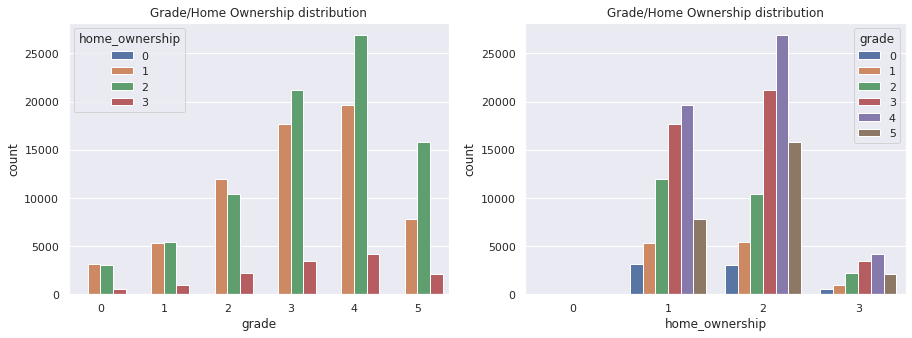

In [31]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=trainingData, 
              x='grade', 
              hue="home_ownership", 
              ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=trainingData, 
              x='home_ownership', 
              hue='grade', 
              ax=ax[1]).set_title("Grade/Home Ownership distribution");

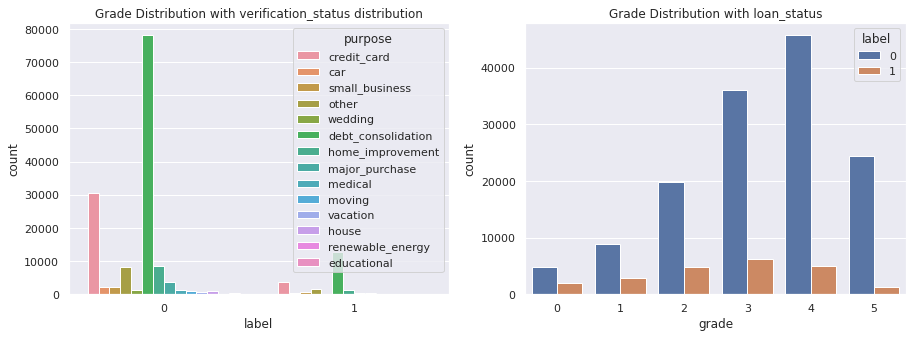

In [32]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=trainingData, 
              x='label', 
              hue='purpose', 
              ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=trainingData, 
              x='grade', 
              hue='label', 
              ax=ax[1]).set_title("Grade Distribution with loan_status");

### **Perform Loan Data Analysis**

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

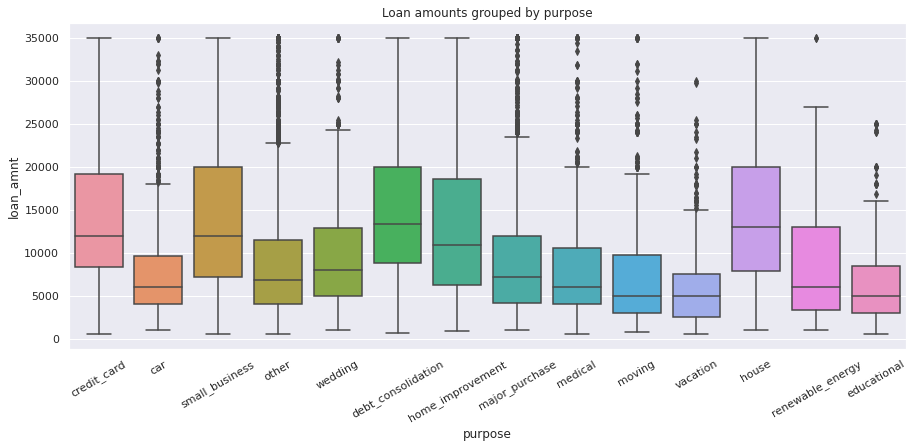

In [33]:
plt.figure(figsize=(15,6))
sns.boxplot(x='purpose', y='loan_amnt', data=trainingData)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

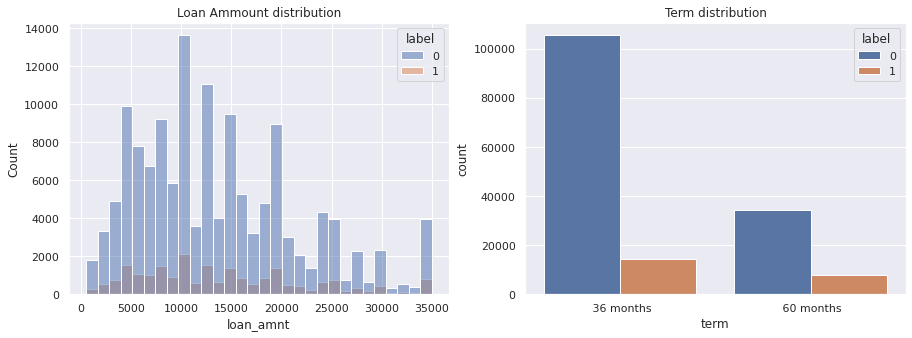

In [34]:
#explore the top 5 categories for the amount of credit with the following purposes: Credit card, MSME business, debt consolidation, home improvement, and buying a house
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(trainingData, 
             x='loan_amnt',
             hue="label", 
             bins=30, 
             ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=trainingData, 
              x='term', 
              hue="label", 
              ax=ax[1]).set_title("Term distribution");

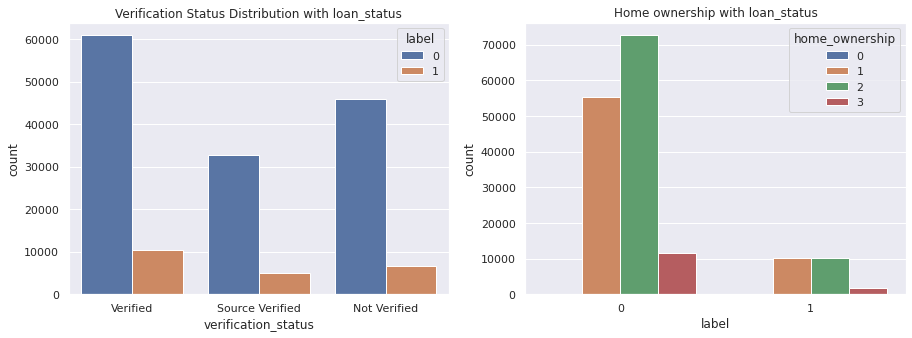

In [35]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=trainingData, 
              hue='home_ownership', 
              x='label', 
              ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=trainingData, 
              x='verification_status', 
              hue='label', 
              ax=ax[0]).set_title("Verification Status Distribution with loan_status");

### **Eplore the correlation between the features using heatmap**

In [36]:
corr = trainingData[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','purpose','label']].corr()

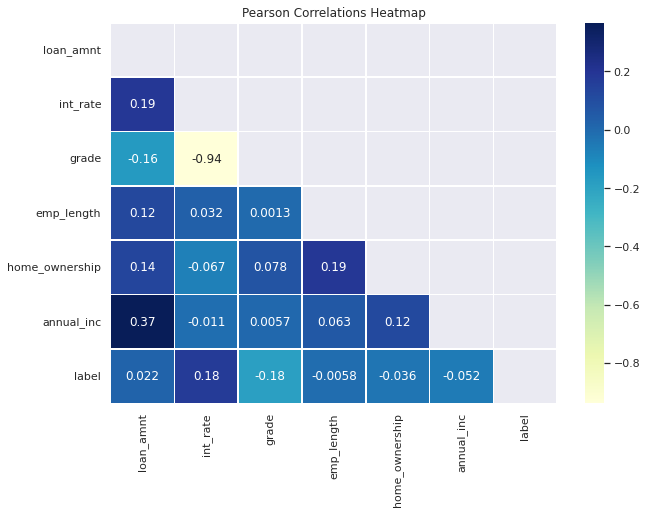

In [37]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(corr,linewidths=.5, 
            annot=True, 
            cmap="YlGnBu",
            mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

**After Data Analysis, we can say that the amount of credit is very dependent on the annual income of the borrower**

## **Perform Data preprocessing**

In [39]:
#to handle the discrete data
for column in ["verification_status", "purpose", "term"]:
    encoding = LabelEncoder()
    encoding.fit(trainingData[column])
    trainingData[column] = encoding.transform(trainingData[column])

In [40]:
trainingData.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,0,10.65,162.87,4,12,1,24000.0,2,1,0
1,2500.0,1,15.27,59.83,3,1,1,30000.0,1,0,1
2,2400.0,0,15.96,84.33,3,12,1,12252.0,0,11,0
3,10000.0,0,13.49,339.31,3,12,1,49200.0,1,9,0
4,3000.0,1,12.69,67.79,4,2,1,80000.0,1,9,0


## **Perform Clustering using Kmeans Algorithm**

In [43]:
#perform clustering 
inetrias_list = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(trainingData)
    inetrias_list.append(kmeans.inertia_)

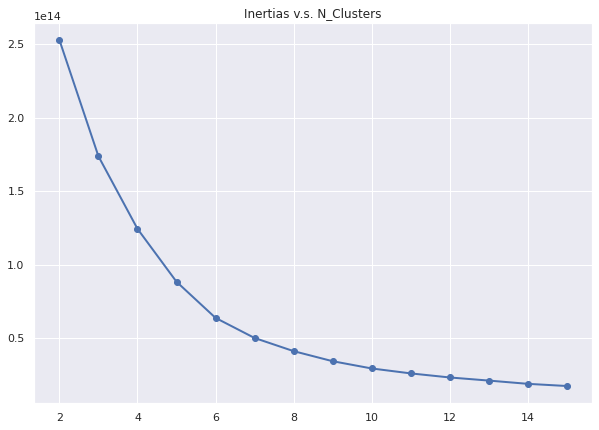

In [44]:
#to plot the elbow curve
plt.figure(figsize=(10,7))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inetrias_list, marker='o', lw=2);

**From the Elbow Curve, the perfect number of clusters should be 4**

In [45]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeansclusters = kmeans.fit_predict(trainingData)

In [46]:
clusteredData = trainingData[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']]

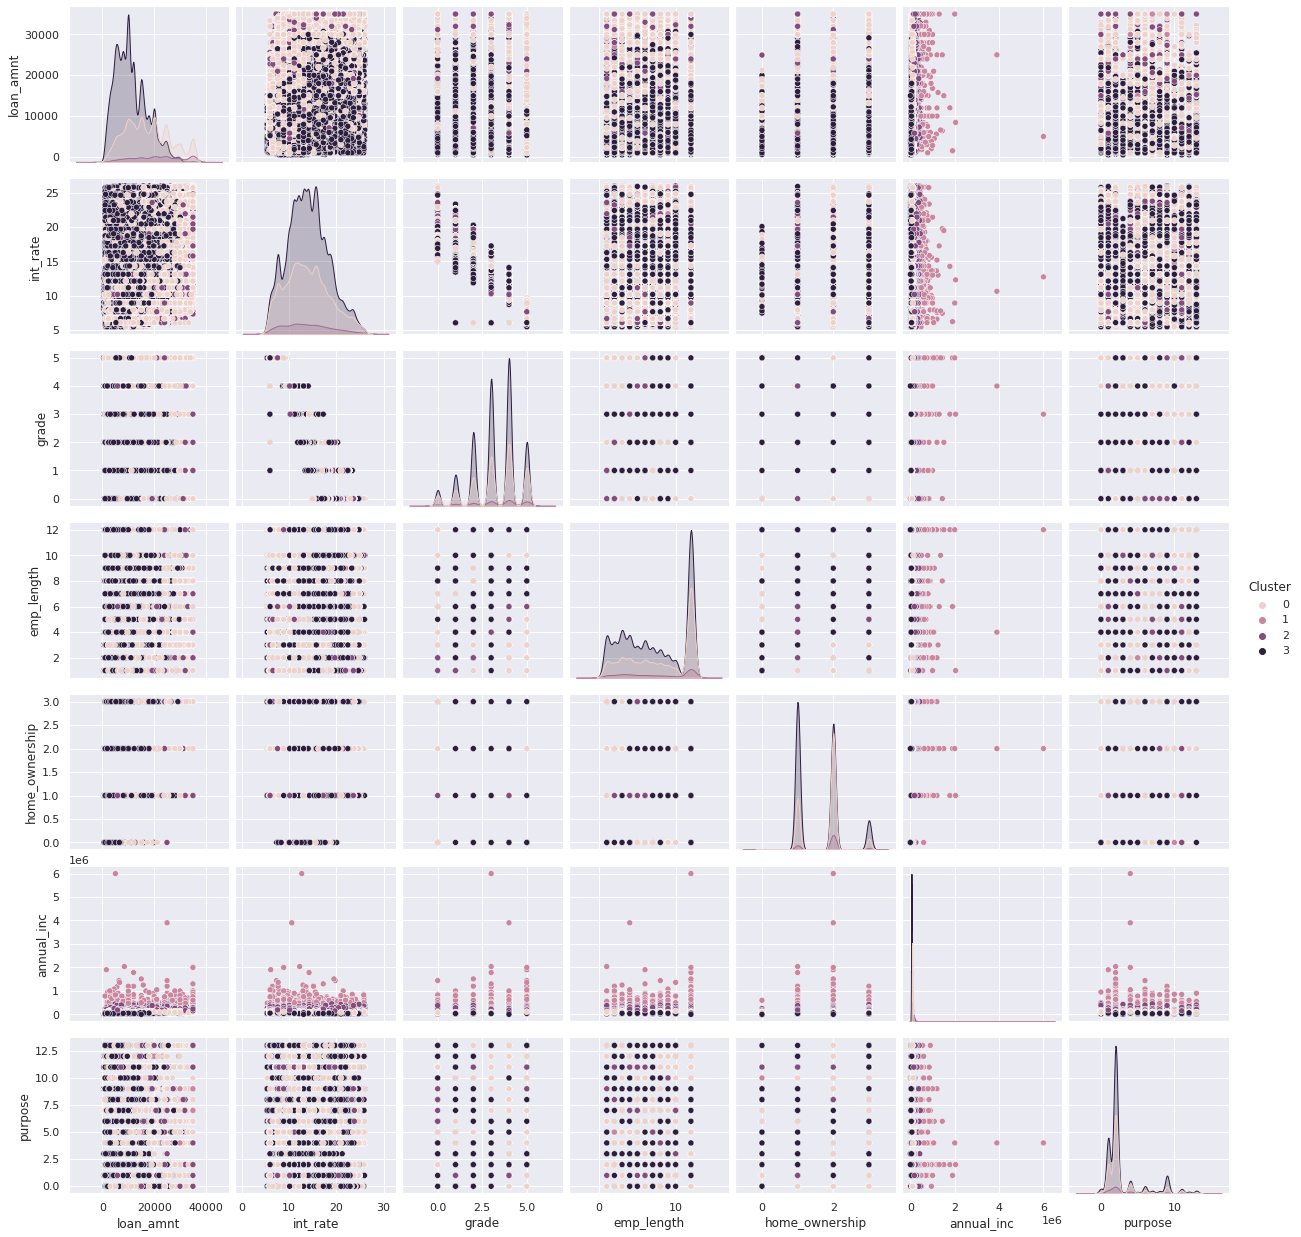

In [47]:
clusteredData["Cluster"] = kmeansclusters

#plot the clusters
sns.pairplot(clusteredData[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose'
                           , "Cluster"]], hue="Cluster");

## **Predicting Credit Risk**

### **Perform classification using Knn algorithm**

In [48]:
X, y = trainingData.drop("label", axis=1), trainingData["label"]

#split the data 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
maximumScore = 0
maximumCluster = 0

#to calculate the clusters
for k in range(1, 100):
    neighbors = KNeighborsClassifier(n_neighbors=k)
    neighbors.fit(X_train,y_train)
    clusteringScore = f1_score(y_test, neighbors.predict(X_test),average='micro')
    if clusteringScore > maximumScore:
        maximumCluster = k
        maximumScore = clusteringScore

In [50]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',
      str(maximumCluster),
      ' to get the best prediction, then the average accuracy is ', maximumScore)

If we use K-Nearest Neighbors Classification, then the value of K is 23  to get the best prediction, then the average accuracy is  0.8616948943009025
